<a href="https://colab.research.google.com/github/Andicleomj/Machine-Learning/blob/main/Week7/XGBoost/tugasxgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Andi Cleopatra Maryam Jamila (1103213071)**

In [43]:
# Instalasi Library yang Dibutuhkan
!pip install xgboost shap scikit-plot

* Perintah ini menginstal tiga library penting yang digunakan dalam analisis model XGBoost:
1. xgboost: Library untuk implementasi algoritma XGBoost (Extreme Gradient Boosting) yang digunakan untuk model regresi atau klasifikasi.
2. shap: Library untuk menjelaskan model machine learning, terutama untuk analisis fitur dan kontribusinya pada prediksi.
3. scikit-plot: Library untuk visualisasi model machine learning dan evaluasi kinerjanya, meskipun di sini tidak digunakan.

In [44]:
# Import Library
import pandas as pd
import numpy as np
from xgboost import XGBRegressor, plot_importance, plot_tree
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import shap
from sklearn.inspection import PartialDependenceDisplay

* pandas: Untuk manipulasi data.
* numpy: Untuk operasi matematika.
* XGBRegressor: Model regresi XGBoost.
* train_test_split: Untuk membagi data menjadi bagian training dan testing.
* learning_curve: Untuk menghasilkan learning curve.
* mean_squared_error: Untuk menghitung error model.
* matplotlib: Untuk visualisasi.
* shap: Untuk menginterpretasi model menggunakan SHAP values.
* PartialDependenceDisplay: Untuk menggambarkan pengaruh satu fitur pada prediksi model.

In [45]:
# Membaca dataset dari file CSV dan menampilkan nama kolom untuk memahami struktur data.
df = pd.read_csv('/content/sample_data/tugasxgboost.csv')
print(df.columns)

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'Class'],
      dtype='object')


* Membaca dataset dari file CSV dan mencetak nama kolom untuk memahami struktur data. Hal ini membantu memastikan kita tahu nama-nama kolom sebelum memisahkan target dan fitur.

In [46]:
# Memisahkan fitur (X) dan target (y)
# Penjelasan: X adalah data input (fitur-fitur prediktif) dan y adalah target (nilai yang ingin diprediksi).
X = df.drop(columns=['X11'])
y = df['X11']

* X berisi fitur atau kolom yang digunakan untuk memprediksi (X11 dihapus).
* y berisi kolom target (X11) yang ingin diprediksi oleh model.

In [47]:
# Pembagian Data untuk Training dan Testing
# Penjelasan: Data dibagi menjadi training (80%) dan testing (20%) agar model dapat diuji pada data yang tidak dilatih.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Membagi data menjadi data training dan data testing dengan proporsi 80% untuk training dan 20% untuk testing.
* random_state=42 memastikan pembagian data yang konsisten jika kode dijalankan ulang.

In [48]:
# Inisialisasi Model XGBoost untuk Regresi
# Penjelasan: Menggunakan XGBoost dengan tujuan regresi (karena target kontinu) dan menggunakan squared error sebagai fungsi loss.
model = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric='rmse', feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

* odel XGBRegressor digunakan untuk tugas regresi.
* objective='reg:squarederror' menetapkan fungsi kerugian sebagai squared error (untuk regresi).
* eval_metric='rmse' menetapkan metrik evaluasi sebagai Root Mean Squared Error (RMSE).
* Model dilatih menggunakan data training (X_train, y_train).

In [49]:
# Evaluasi Model
# Penjelasan: Mengukur performa model menggunakan Mean Squared Error (MSE).
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
# Insight: MSE menunjukkan seberapa jauh prediksi model berbeda dari nilai aktual secara rata-rata


Mean Squared Error: 0.27


* Model digunakan untuk memprediksi target (y_pred) berdasarkan data testing (X_test).
* MSE dihitung untuk mengukur seberapa baik model memprediksi nilai target. Semakin rendah nilai MSE, semakin baik prediksi model.

<Figure size 1000x800 with 0 Axes>

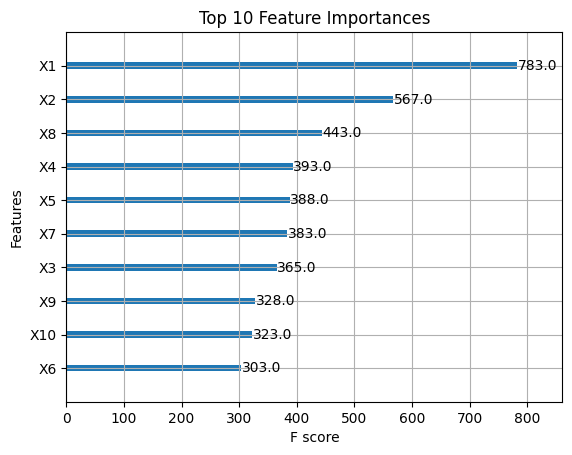

In [50]:
# Visualisasi Feature Importance
# Penjelasan: Menampilkan fitur-fitur yang paling berpengaruh dalam model menggunakan XGBoost.
plt.figure(figsize=(10, 8))
plot_importance(model, max_num_features=10)
plt.title('Top 10 Feature Importances')
plt.show()
# Insight: Visualisasi ini menunjukkan fitur-fitur yang paling berkontribusi dalam model. Semakin tinggi peringkat suatu fitur, semakin signifikan pengaruhnya terhadap prediksi.

* Menampilkan grafik yang menunjukkan fitur-fitur yang paling berpengaruh dalam model XGBoost.
* Fitur dengan nilai penting tertinggi adalah yang memiliki pengaruh terbesar terhadap prediksi model.

<Figure size 2000x1000 with 0 Axes>

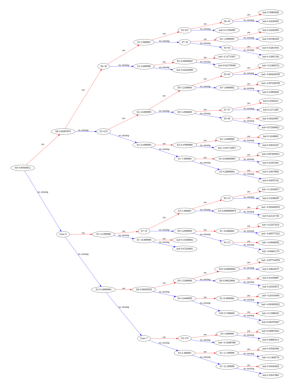

In [51]:
# Visualisasi Struktur Pohon
# Penjelasan: Menampilkan salah satu pohon keputusan dari model XGBoost, membantu memahami bagaimana model membuat prediksi.
plt.figure(figsize=(20, 10))
plot_tree(model, num_trees=0, rankdir='LR')
plt.show()
# Insight: Pohon keputusan ini menunjukkan bagaimana data dibagi berdasarkan fitur-fitur untuk menghasilkan prediksi akhir. Setiap node adalah kondisi atau keputusan berdasarkan suatu fitur.

* Menampilkan salah satu pohon keputusan dalam model XGBoost. Pohon ini menggambarkan bagaimana model membuat keputusan berdasarkan fitur-fitur yang ada.

In [52]:
# Learning Curve (untuk model regresi)
# Penjelasan: Menampilkan learning curve untuk melihat performa model seiring dengan penambahan data training.
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='neg_mean_squared_error')
train_mean = -np.mean(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)

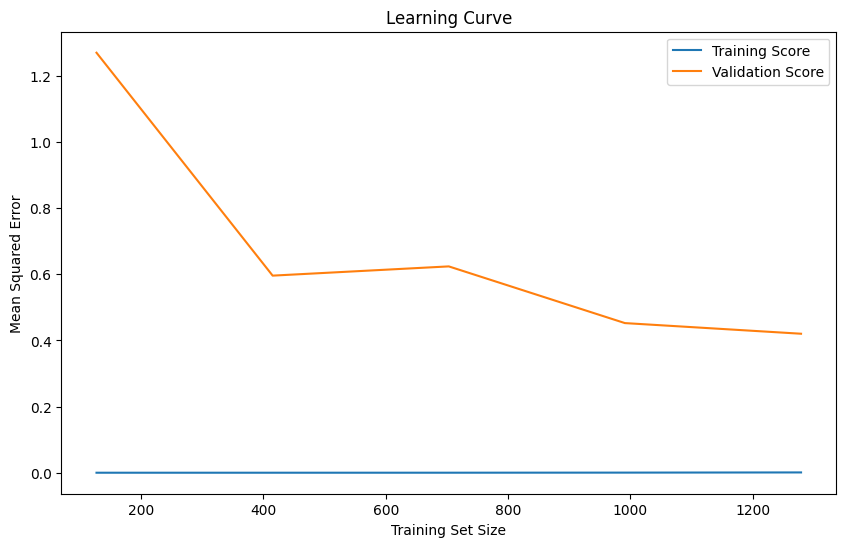

In [53]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()
# Insight: Learning curve menunjukkan bagaimana performa model di data training dan validasi. Jika error di data training rendah dan di validasi tinggi, model mungkin overfitting.


* Learning curve menggambarkan kinerja model terhadap berbagai ukuran data training.
* Training Score menunjukkan kesalahan model pada data training.
* Validation Score menunjukkan kesalahan model pada data validasi.

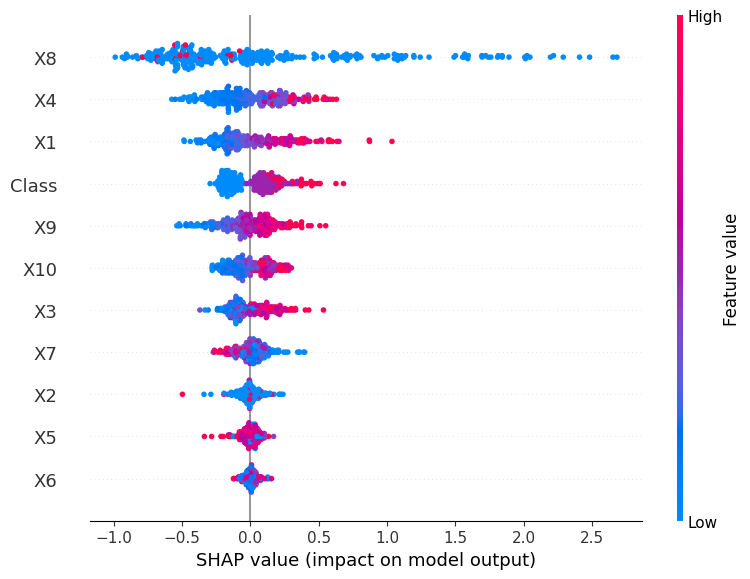

In [54]:
# SHAP Values untuk Regresi
# Penjelasan: SHAP (SHapley Additive exPlanations) menjelaskan kontribusi setiap fitur dalam prediksi model untuk setiap instance data.
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)
# Insight: SHAP summary plot menampilkan dampak dari setiap fitur terhadap prediksi model. Semakin lebar penyebaran suatu fitur, semakin besar pengaruhnya.

* SHAP (SHapley Additive exPlanations) memberikan interpretasi fitur untuk setiap prediksi yang dihasilkan model.
* SHAP values menunjukkan kontribusi masing-masing fitur pada prediksi model.

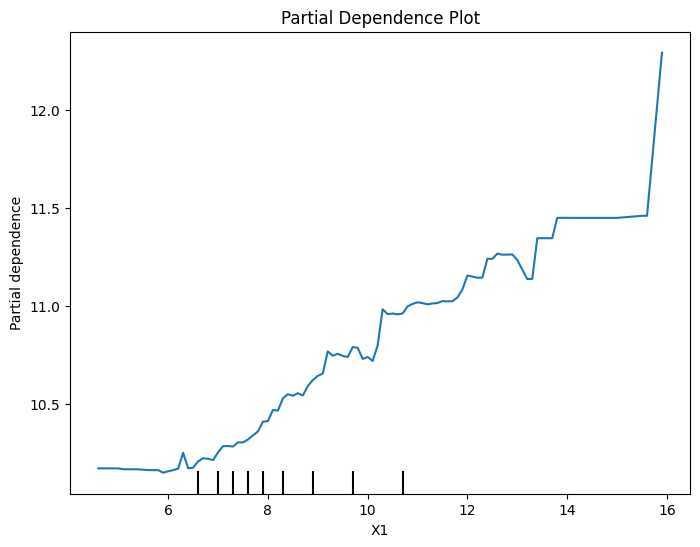

In [55]:
# Partial Dependence Plot menggunakan PartialDependenceDisplay
# Penjelasan: Partial Dependence Plot menunjukkan hubungan antara fitur tertentu dan prediksi model, sementara fitur lainnya tetap konstan.
fig, ax = plt.subplots(figsize=(8, 6))
PartialDependenceDisplay.from_estimator(model, X_train, features=[0], ax=ax)  # Ganti [0] dengan indeks/nama fitur yang sesuai
plt.title('Partial Dependence Plot')
plt.show()
# Insight: Grafik ini menunjukkan bagaimana perubahan nilai fitur tertentu memengaruhi prediksi model. Ini membantu memahami pengaruh fitur pada prediksi secara keseluruhan.

* Partial Dependence Plot menunjukkan pengaruh satu fitur terhadap prediksi model, dengan fitur lainnya dipertahankan konstan.